# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.exclude_past)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 8866 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.exclude_past)


  0% (   1 of 8866) |              | Elapsed Time: 0:00:29 ETA:  3 days, 1:18:54

  0% (  71 of 8866) |                      | Elapsed Time: 0:00:30 ETA:  0:01:36

  1% ( 111 of 8866) |                      | Elapsed Time: 0:00:31 ETA:  0:01:39

  2% ( 184 of 8866) |                      | Elapsed Time: 0:00:32 ETA:  0:01:35

  2% ( 222 of 8866) |                      | Elapsed Time: 0:00:32 ETA:  0:01:33

  3% ( 281 of 8866) |                      | Elapsed Time: 0:00:33 ETA:  0:01:37

  3% ( 333 of 8866) |                      | Elapsed Time: 0:00:34 ETA:  0:01:42

  4% ( 392 of 8866) |                      | Elapsed Time: 0:00:35 ETA:  0:01:43

  5% ( 444 of 8866) |#                     | Elapsed Time: 0:00:36 ETA:  0:01:42

  5% ( 509 of 8866) |#                     | Elapsed Time: 0:00:37 ETA:  0:01:41

  6% ( 555 of 8866) |#                     | Elapsed Time: 0:00:38 ETA:  0:01:41

  7% ( 621 of 8866) |#                     | Elapsed Time: 0:00:39 ETA:  0:01:40

  7% ( 665 of 8866) |#                     | Elapsed Time: 0:00:40 ETA:  0:01:44

  8% ( 734 of 8866) |#                     | Elapsed Time: 0:00:41 ETA:  0:01:43

  8% ( 776 of 8866) |#                     | Elapsed Time: 0:00:41 ETA:  0:01:40

  9% ( 834 of 8866) |##                    | Elapsed Time: 0:00:42 ETA:  0:01:38

 10% ( 887 of 8866) |##                    | Elapsed Time: 0:00:43 ETA:  0:01:36

 10% ( 954 of 8866) |##                    | Elapsed Time: 0:00:44 ETA:  0:01:34

 11% ( 998 of 8866) |##                    | Elapsed Time: 0:00:45 ETA:  0:01:32

 12% (1068 of 8866) |##                    | Elapsed Time: 0:00:46 ETA:  0:01:30

 12% (1109 of 8866) |##                    | Elapsed Time: 0:00:47 ETA:  0:01:32

 13% (1175 of 8866) |##                    | Elapsed Time: 0:00:48 ETA:  0:01:28

 13% (1220 of 8866) |###                   | Elapsed Time: 0:00:48 ETA:  0:01:27

 14% (1274 of 8866) |###                   | Elapsed Time: 0:00:49 ETA:  0:01:30

 15% (1330 of 8866) |###                   | Elapsed Time: 0:00:50 ETA:  0:01:29

 15% (1399 of 8866) |###                   | Elapsed Time: 0:00:51 ETA:  0:01:27

 16% (1441 of 8866) |###                   | Elapsed Time: 0:00:52 ETA:  0:01:26

 17% (1509 of 8866) |###                   | Elapsed Time: 0:00:53 ETA:  0:01:26

 17% (1552 of 8866) |###                   | Elapsed Time: 0:00:54 ETA:  0:01:26

 18% (1622 of 8866) |####                  | Elapsed Time: 0:00:55 ETA:  0:01:21

 18% (1663 of 8866) |####                  | Elapsed Time: 0:00:55 ETA:  0:01:20

 19% (1728 of 8866) |####                  | Elapsed Time: 0:00:56 ETA:  0:01:20

 20% (1774 of 8866) |####                  | Elapsed Time: 0:00:57 ETA:  0:01:16

 20% (1833 of 8866) |####                  | Elapsed Time: 0:00:58 ETA:  0:01:15

 21% (1885 of 8866) |####                  | Elapsed Time: 0:00:59 ETA:  0:01:16

 21% (1937 of 8866) |####                  | Elapsed Time: 0:01:00 ETA:  0:01:19

 22% (1995 of 8866) |####                  | Elapsed Time: 0:01:01 ETA:  0:01:25

 23% (2066 of 8866) |#####                 | Elapsed Time: 0:01:02 ETA:  0:01:24

 23% (2106 of 8866) |#####                 | Elapsed Time: 0:01:03 ETA:  0:01:26

 24% (2179 of 8866) |#####                 | Elapsed Time: 0:01:04 ETA:  0:01:22

 25% (2217 of 8866) |#####                 | Elapsed Time: 0:01:04 ETA:  0:01:20

 25% (2284 of 8866) |#####                 | Elapsed Time: 0:01:05 ETA:  0:01:17

 26% (2314 of 8866) |#####                 | Elapsed Time: 0:01:07 ETA:  0:01:37

 26% (2328 of 8866) |#####                 | Elapsed Time: 0:01:07 ETA:  0:01:35

 26% (2391 of 8866) |#####                 | Elapsed Time: 0:01:08 ETA:  0:01:29

 27% (2439 of 8866) |######                | Elapsed Time: 0:01:09 ETA:  0:01:24

 28% (2506 of 8866) |######                | Elapsed Time: 0:01:10 ETA:  0:01:25

 28% (2549 of 8866) |######                | Elapsed Time: 0:01:10 ETA:  0:01:23

 29% (2613 of 8866) |######                | Elapsed Time: 0:01:11 ETA:  0:01:25

 30% (2660 of 8866) |######                | Elapsed Time: 0:01:12 ETA:  0:01:26

 30% (2729 of 8866) |######                | Elapsed Time: 0:01:13 ETA:  0:01:24

 31% (2771 of 8866) |######                | Elapsed Time: 0:01:14 ETA:  0:01:02

 31% (2830 of 8866) |#######               | Elapsed Time: 0:01:15 ETA:  0:01:03

 32% (2882 of 8866) |#######               | Elapsed Time: 0:01:16 ETA:  0:01:03

 33% (2943 of 8866) |#######               | Elapsed Time: 0:01:17 ETA:  0:01:03

 33% (2993 of 8866) |#######               | Elapsed Time: 0:01:17 ETA:  0:01:05

 34% (3057 of 8866) |#######               | Elapsed Time: 0:01:18 ETA:  0:01:03

 35% (3104 of 8866) |#######               | Elapsed Time: 0:01:19 ETA:  0:01:01

 35% (3173 of 8866) |#######               | Elapsed Time: 0:01:20 ETA:  0:00:59

 36% (3214 of 8866) |#######               | Elapsed Time: 0:01:21 ETA:  0:00:59

 36% (3268 of 8866) |########              | Elapsed Time: 0:01:22 ETA:  0:01:01

 37% (3325 of 8866) |########              | Elapsed Time: 0:01:23 ETA:  0:00:57

 38% (3394 of 8866) |########              | Elapsed Time: 0:01:24 ETA:  0:00:54

 38% (3436 of 8866) |########              | Elapsed Time: 0:01:24 ETA:  0:00:53

 39% (3504 of 8866) |########              | Elapsed Time: 0:01:25 ETA:  0:00:50

 40% (3547 of 8866) |########              | Elapsed Time: 0:01:26 ETA:  0:00:48

 40% (3611 of 8866) |########              | Elapsed Time: 0:01:27 ETA:  0:00:48

 41% (3658 of 8866) |#########             | Elapsed Time: 0:01:28 ETA:  0:00:49

 42% (3724 of 8866) |#########             | Elapsed Time: 0:01:29 ETA:  0:00:48

 42% (3769 of 8866) |#########             | Elapsed Time: 0:01:29 ETA:  0:00:43

 43% (3832 of 8866) |#########             | Elapsed Time: 0:01:30 ETA:  0:00:45

 43% (3879 of 8866) |#########             | Elapsed Time: 0:01:31 ETA:  0:00:46

 44% (3937 of 8866) |#########             | Elapsed Time: 0:01:32 ETA:  0:00:45

 45% (3990 of 8866) |#########             | Elapsed Time: 0:01:33 ETA:  0:00:53

 45% (4049 of 8866) |##########            | Elapsed Time: 0:01:34 ETA:  0:00:53

 46% (4101 of 8866) |##########            | Elapsed Time: 0:01:35 ETA:  0:00:54

 46% (4164 of 8866) |##########            | Elapsed Time: 0:01:36 ETA:  0:00:53

 47% (4212 of 8866) |##########            | Elapsed Time: 0:01:37 ETA:  0:00:58

 48% (4272 of 8866) |##########            | Elapsed Time: 0:01:38 ETA:  0:00:59

 48% (4323 of 8866) |##########            | Elapsed Time: 0:01:39 ETA:  0:00:56

 49% (4382 of 8866) |##########            | Elapsed Time: 0:01:40 ETA:  0:00:55

 50% (4434 of 8866) |###########           | Elapsed Time: 0:01:41 ETA:  0:00:48

 50% (4506 of 8866) |###########           | Elapsed Time: 0:01:42 ETA:  0:00:43

 51% (4544 of 8866) |###########           | Elapsed Time: 0:01:42 ETA:  0:00:41

 51% (4607 of 8866) |###########           | Elapsed Time: 0:01:43 ETA:  0:00:39

 52% (4655 of 8866) |###########           | Elapsed Time: 0:01:44 ETA:  0:00:39

 53% (4704 of 8866) |###########           | Elapsed Time: 0:01:45 ETA:  0:00:37

 53% (4747 of 8866) |###########           | Elapsed Time: 0:01:46 ETA:  0:00:41

 53% (4766 of 8866) |###########           | Elapsed Time: 0:01:46 ETA:  0:00:43

 54% (4832 of 8866) |###########           | Elapsed Time: 0:01:47 ETA:  0:00:40

 55% (4877 of 8866) |############          | Elapsed Time: 0:01:48 ETA:  0:00:41

 55% (4942 of 8866) |############          | Elapsed Time: 0:01:49 ETA:  0:00:43

 56% (4988 of 8866) |############          | Elapsed Time: 0:01:50 ETA:  0:00:42

 56% (5045 of 8866) |############          | Elapsed Time: 0:01:51 ETA:  0:00:43

 57% (5098 of 8866) |############          | Elapsed Time: 0:01:52 ETA:  0:00:43

 58% (5169 of 8866) |############          | Elapsed Time: 0:01:53 ETA:  0:00:34

 58% (5209 of 8866) |############          | Elapsed Time: 0:01:54 ETA:  0:00:28

 59% (5267 of 8866) |#############         | Elapsed Time: 0:01:55 ETA:  0:00:28

 60% (5320 of 8866) |#############         | Elapsed Time: 0:01:55 ETA:  0:00:27

 60% (5387 of 8866) |#############         | Elapsed Time: 0:01:56 ETA:  0:00:23

 61% (5431 of 8866) |#############         | Elapsed Time: 0:01:57 ETA:  0:00:22

 61% (5496 of 8866) |#############         | Elapsed Time: 0:01:58 ETA:  0:00:22

 62% (5542 of 8866) |#############         | Elapsed Time: 0:01:59 ETA:  0:00:19

 63% (5608 of 8866) |#############         | Elapsed Time: 0:02:00 ETA:  0:00:16

 63% (5640 of 8866) |#############         | Elapsed Time: 0:02:02 ETA:  0:00:42

 63% (5653 of 8866) |##############        | Elapsed Time: 0:02:02 ETA:  0:00:43

 64% (5717 of 8866) |##############        | Elapsed Time: 0:02:03 ETA:  0:00:40

 65% (5763 of 8866) |##############        | Elapsed Time: 0:02:04 ETA:  0:00:40

 65% (5812 of 8866) |##############        | Elapsed Time: 0:02:05 ETA:  0:00:46

 66% (5874 of 8866) |##############        | Elapsed Time: 0:02:06 ETA:  0:00:52

 66% (5935 of 8866) |##############        | Elapsed Time: 0:02:07 ETA:  0:00:51

 67% (5985 of 8866) |##############        | Elapsed Time: 0:02:07 ETA:  0:00:53

 68% (6050 of 8866) |###############       | Elapsed Time: 0:02:08 ETA:  0:00:19

 68% (6096 of 8866) |###############       | Elapsed Time: 0:02:09 ETA:  0:00:18

 69% (6155 of 8866) |###############       | Elapsed Time: 0:02:10 ETA:  0:00:19

 70% (6207 of 8866) |###############       | Elapsed Time: 0:02:11 ETA:  0:00:17

 70% (6271 of 8866) |###############       | Elapsed Time: 0:02:12 ETA:  0:00:12

 71% (6318 of 8866) |###############       | Elapsed Time: 0:02:13 ETA:  0:00:09

 72% (6387 of 8866) |###############       | Elapsed Time: 0:02:14 ETA:  0:00:06

 72% (6428 of 8866) |###############       | Elapsed Time: 0:02:14 ETA:  0:00:04

 73% (6483 of 8866) |################      | Elapsed Time: 0:02:15 ETA:  0:00:06

 73% (6539 of 8866) |################      | Elapsed Time: 0:02:16 ETA:  0:00:06

 74% (6608 of 8866) |################      | Elapsed Time: 0:02:17 ETA:  0:00:02

 75% (6650 of 8866) |################      | Elapsed Time: 0:02:18 ETA:  0:00:00

 75% (6698 of 8866) |################      | Elapsed Time: 0:02:19 ETA:  0:00:03

 76% (6761 of 8866) |################      | Elapsed Time: 0:02:20 ETA:  0:00:01

 76% (6824 of 8866) |################      | Elapsed Time: 0:02:21 ETA:  0:00:01

 77% (6872 of 8866) |#################     | Elapsed Time: 0:02:22 ETA:  0:00:02

 78% (6942 of 8866) |#################     | Elapsed Time: 0:02:23 ETA:  0:00:00

 78% (6982 of 8866) |#################     | Elapsed Time: 0:02:23 ETA:  0:00:00

 79% (7042 of 8866) |#################     | Elapsed Time: 0:02:24 ETA:  0:00:00

 80% (7093 of 8866) |#################     | Elapsed Time: 0:02:25 ETA:  0:00:02

 80% (7157 of 8866) |#################     | Elapsed Time: 0:02:26 ETA:  0:00:00

 81% (7204 of 8866) |#################     | Elapsed Time: 0:02:27 ETA:  0:00:00

 81% (7266 of 8866) |##################    | Elapsed Time: 0:02:28 ETA:  0:00:00

 82% (7315 of 8866) |##################    | Elapsed Time: 0:02:29 ETA:  0:00:00

 83% (7376 of 8866) |##################    | Elapsed Time: 0:02:30 ETA:  0:00:00

 83% (7426 of 8866) |##################    | Elapsed Time: 0:02:31 ETA:  0:00:00

 84% (7492 of 8866) |##################    | Elapsed Time: 0:02:32 ETA:  0:00:00

 85% (7537 of 8866) |##################    | Elapsed Time: 0:02:33 ETA:  0:00:00

 85% (7595 of 8866) |##################    | Elapsed Time: 0:02:34 ETA:  0:00:00

 86% (7647 of 8866) |##################    | Elapsed Time: 0:02:35 ETA:  0:00:00

 87% (7715 of 8866) |###################   | Elapsed Time: 0:02:36 ETA:  0:00:00

 87% (7758 of 8866) |###################   | Elapsed Time: 0:02:36 ETA:  0:00:00

 88% (7826 of 8866) |###################   | Elapsed Time: 0:02:37 ETA:  0:00:00

 88% (7869 of 8866) |###################   | Elapsed Time: 0:02:38 ETA:  0:00:00

 89% (7936 of 8866) |###################   | Elapsed Time: 0:02:39 ETA:  0:00:00

 90% (7980 of 8866) |###################   | Elapsed Time: 0:02:40 ETA:  0:00:00

 90% (8049 of 8866) |###################   | Elapsed Time: 0:02:41 ETA:  0:00:00

 91% (8091 of 8866) |####################  | Elapsed Time: 0:02:41 ETA:  0:00:00

 92% (8160 of 8866) |####################  | Elapsed Time: 0:02:42 ETA:  0:00:00

 92% (8202 of 8866) |####################  | Elapsed Time: 0:02:43 ETA:  0:00:00

 93% (8269 of 8866) |####################  | Elapsed Time: 0:02:44 ETA:  0:00:00

 93% (8312 of 8866) |####################  | Elapsed Time: 0:02:45 ETA:  0:00:00

 94% (8379 of 8866) |####################  | Elapsed Time: 0:02:46 ETA:  0:00:00

 95% (8423 of 8866) |####################  | Elapsed Time: 0:02:46 ETA:  0:00:00

 95% (8492 of 8866) |##################### | Elapsed Time: 0:02:47 ETA:  0:00:00

 96% (8534 of 8866) |##################### | Elapsed Time: 0:02:48 ETA:  0:00:00

 97% (8605 of 8866) |##################### | Elapsed Time: 0:02:49 ETA:  0:00:00

 97% (8645 of 8866) |##################### | Elapsed Time: 0:02:50 ETA:  0:00:00

 98% (8707 of 8866) |##################### | Elapsed Time: 0:02:51 ETA:  0:00:00

 98% (8756 of 8866) |##################### | Elapsed Time: 0:02:51 ETA:  0:00:00

 99% (8813 of 8866) |##################### | Elapsed Time: 0:02:52 ETA:  0:00:00

100% (8866 of 8866) |######################| Elapsed Time: 0:02:53 Time: 0:02:53


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(x, y, **kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data[x + rel]
    y = data[y + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / h0s.mean(), '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / h0s.mean(), (values - h0ns + cis) / h0s.mean(),
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

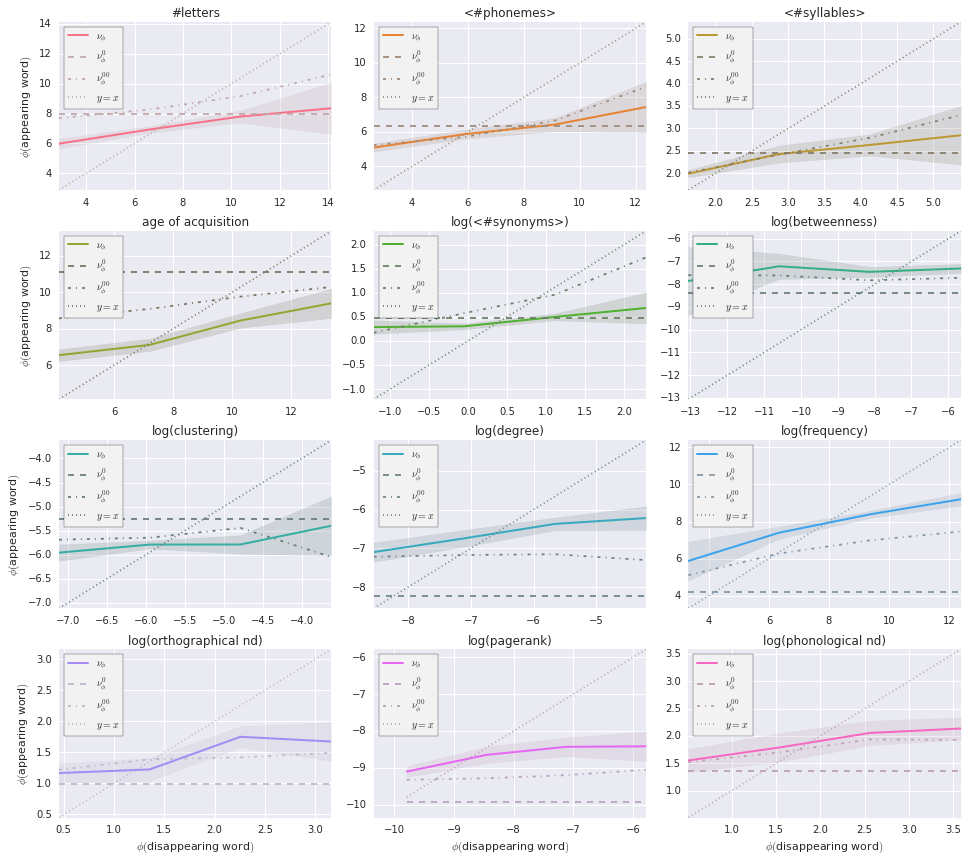

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

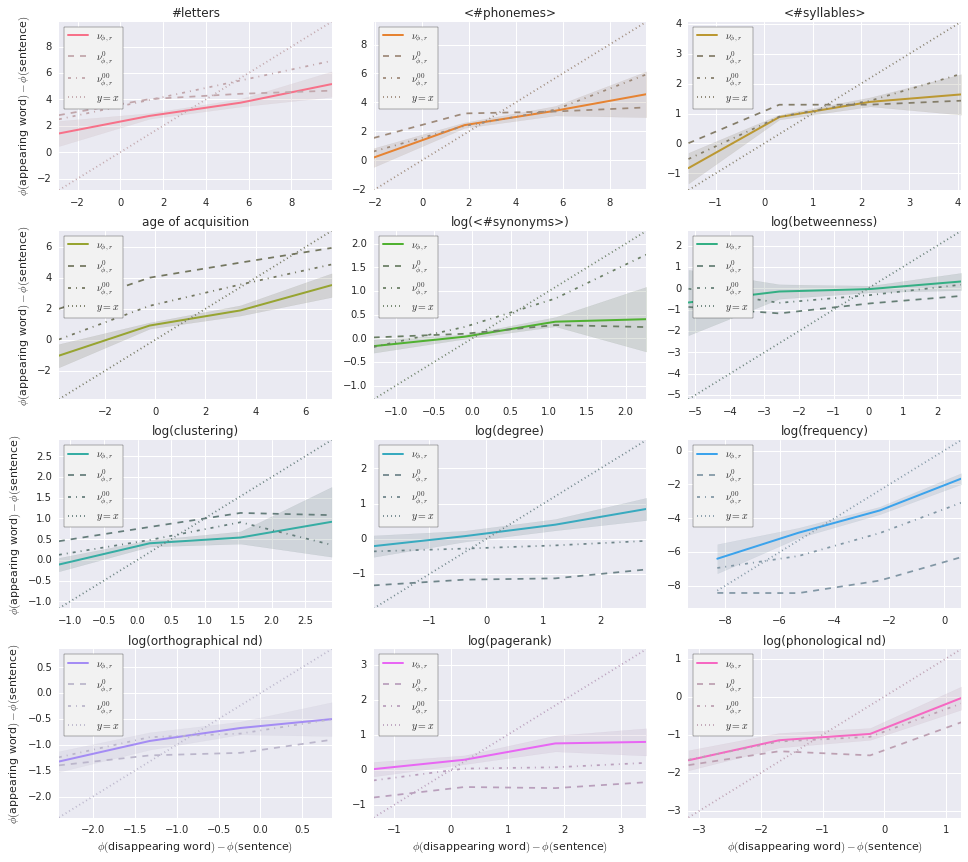

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

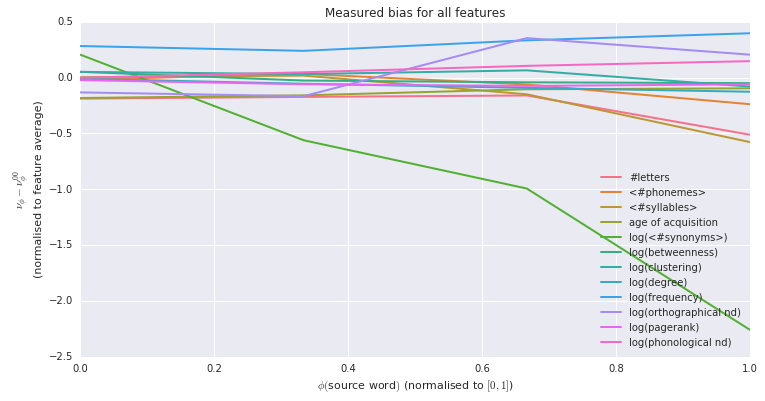

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

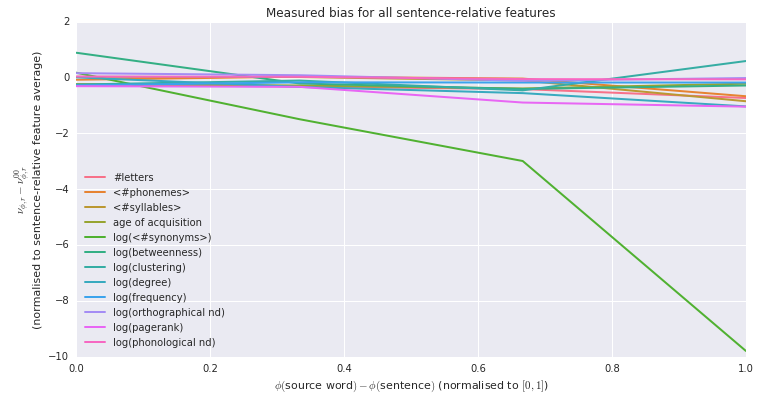

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

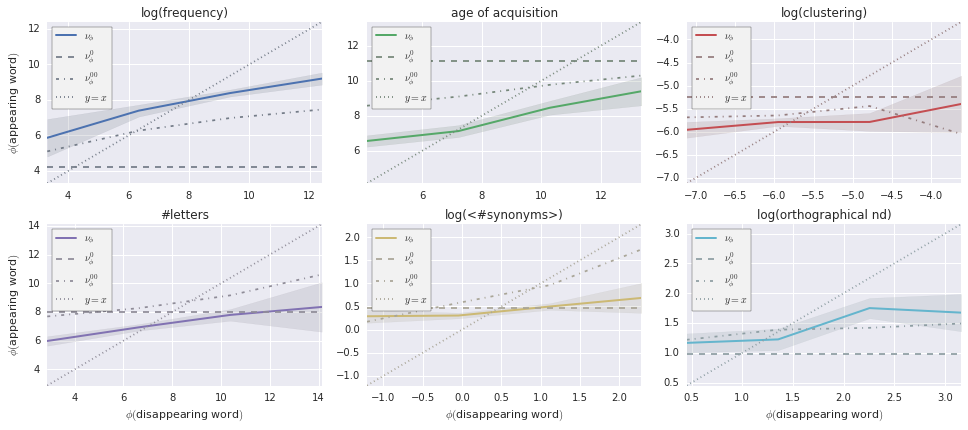

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

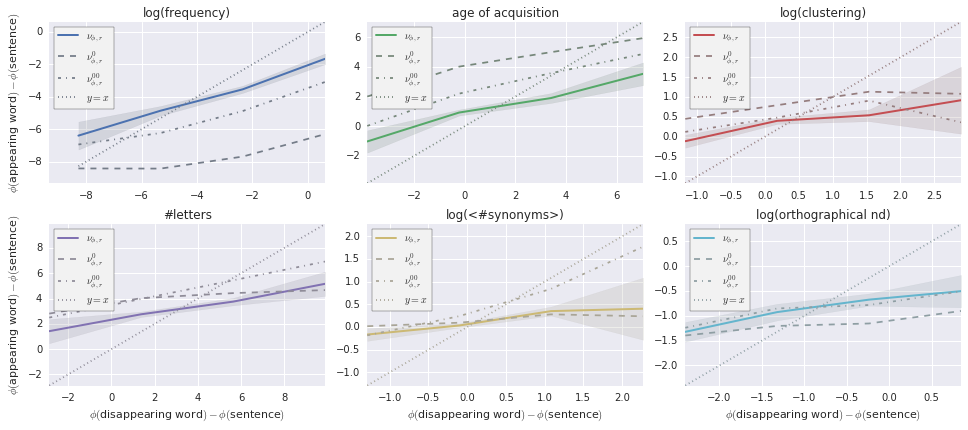

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

And the same with features relative to sentence average

Now $\nu_{\phi} - \nu_{\phi}^{00}$

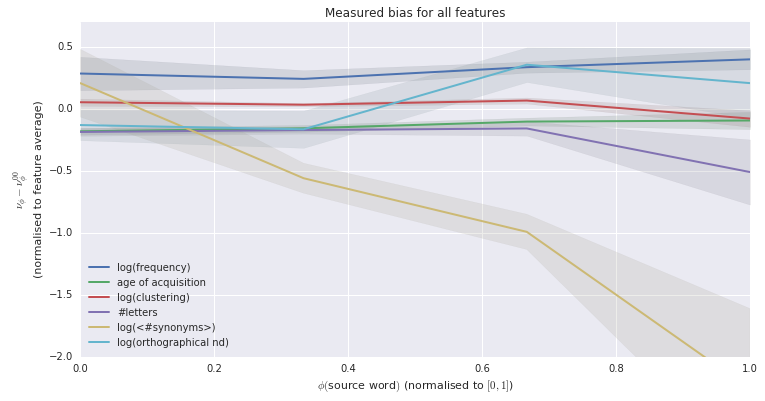

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

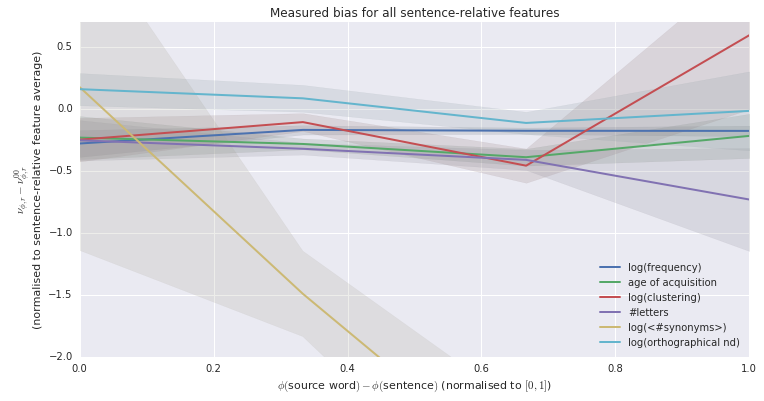

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


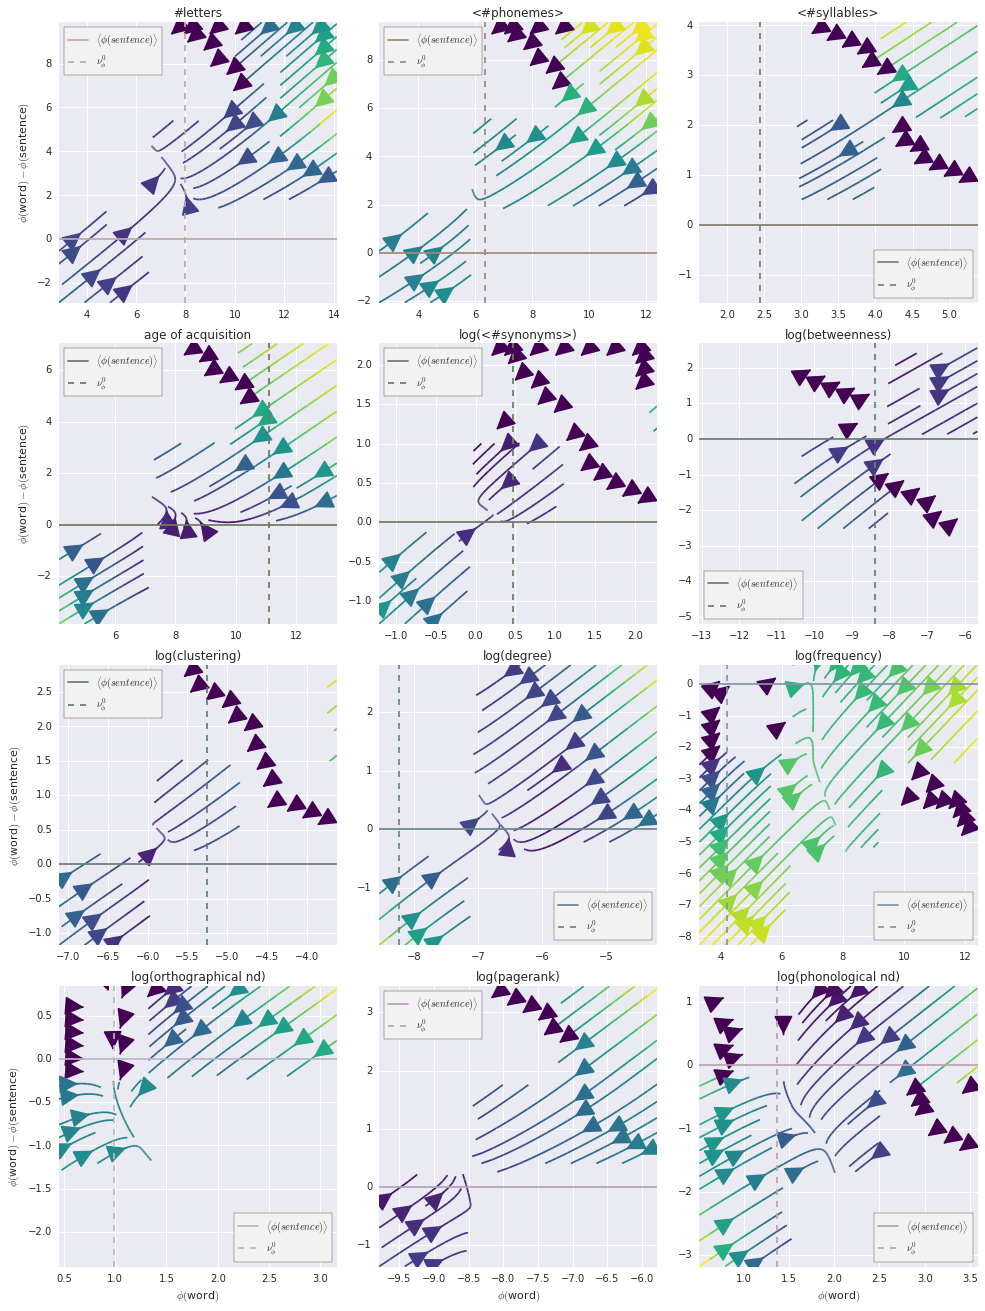

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


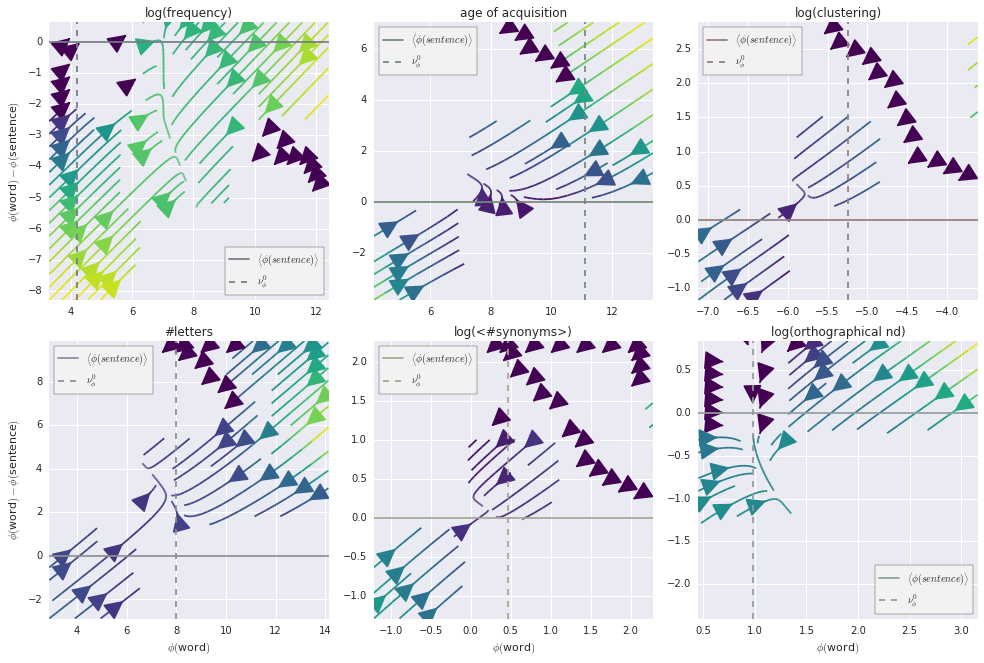

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.54283479  0.15936567  0.08692472  0.07102772  0.0347647   0.03038111
  0.02018509  0.0170454   0.01578729  0.00949413  0.00718335]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.426186,0.323142,-0.087514,0.258938,0.243070,-0.422027,0.229719,0.302622,-0.392607,0.282084,-0.154748,-0.006232
Component-1,0.269753,-0.392112,0.124473,-0.284484,-0.285923,-0.412915,0.174116,-0.310226,-0.455163,0.251739,-0.166110,0.010561
Component-2,-0.722398,-0.118863,0.130996,-0.054653,-0.649357,0.080787,0.020464,-0.029508,0.067135,-0.071441,0.004838,0.068920


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 8866) |             | Elapsed Time: 0:00:44 ETA:  4 days, 14:39:48

  1% ( 111 of 8866) |                      | Elapsed Time: 0:00:46 ETA:  0:00:40

  2% ( 222 of 8866) |                      | Elapsed Time: 0:00:46 ETA:  0:00:32

  3% ( 333 of 8866) |                      | Elapsed Time: 0:00:48 ETA:  0:00:34

  4% ( 412 of 8866) |#                     | Elapsed Time: 0:00:49 ETA:  0:00:39

  5% ( 444 of 8866) |#                     | Elapsed Time: 0:00:49 ETA:  0:00:40

  5% ( 523 of 8866) |#                     | Elapsed Time: 0:00:50 ETA:  0:00:42

  6% ( 555 of 8866) |#                     | Elapsed Time: 0:00:50 ETA:  0:00:43

  7% ( 632 of 8866) |#                     | Elapsed Time: 0:00:51 ETA:  0:00:47

  7% ( 665 of 8866) |#                     | Elapsed Time: 0:00:52 ETA:  0:00:47

  8% ( 776 of 8866) |#                     | Elapsed Time: 0:00:53 ETA:  0:00:46

 10% ( 887 of 8866) |##                    | Elapsed Time: 0:00:54 ETA:  0:00:46

 11% ( 998 of 8866) |##                    | Elapsed Time: 0:00:55 ETA:  0:00:41

 12% (1085 of 8866) |##                    | Elapsed Time: 0:00:56 ETA:  0:00:38

 12% (1109 of 8866) |##                    | Elapsed Time: 0:00:56 ETA:  0:00:37

 13% (1220 of 8866) |###                   | Elapsed Time: 0:00:57 ETA:  0:00:31

 14% (1300 of 8866) |###                   | Elapsed Time: 0:00:58 ETA:  0:00:37

 15% (1330 of 8866) |###                   | Elapsed Time: 0:00:59 ETA:  0:00:39

 16% (1441 of 8866) |###                   | Elapsed Time: 0:01:00 ETA:  0:00:35

 17% (1552 of 8866) |###                   | Elapsed Time: 0:01:01 ETA:  0:00:31

 18% (1663 of 8866) |####                  | Elapsed Time: 0:01:02 ETA:  0:00:27

 20% (1774 of 8866) |####                  | Elapsed Time: 0:01:03 ETA:  0:00:24

 21% (1885 of 8866) |####                  | Elapsed Time: 0:01:04 ETA:  0:00:18

 22% (1995 of 8866) |####                  | Elapsed Time: 0:01:05 ETA:  0:00:18

 23% (2106 of 8866) |#####                 | Elapsed Time: 0:01:06 ETA:  0:00:17

 25% (2217 of 8866) |#####                 | Elapsed Time: 0:01:07 ETA:  0:00:16

 26% (2328 of 8866) |#####                 | Elapsed Time: 0:01:08 ETA:  0:00:13

 27% (2439 of 8866) |######                | Elapsed Time: 0:01:09 ETA:  0:00:12

 28% (2549 of 8866) |######                | Elapsed Time: 0:01:10 ETA:  0:00:09

 30% (2660 of 8866) |######                | Elapsed Time: 0:01:11 ETA:  0:00:07

 31% (2753 of 8866) |######                | Elapsed Time: 0:01:12 ETA:  0:00:08

 31% (2771 of 8866) |######                | Elapsed Time: 0:01:12 ETA:  0:00:07

 32% (2854 of 8866) |#######               | Elapsed Time: 0:01:13 ETA:  0:00:09

 32% (2882 of 8866) |#######               | Elapsed Time: 0:01:13 ETA:  0:00:10

 33% (2970 of 8866) |#######               | Elapsed Time: 0:01:14 ETA:  0:00:13

 33% (2993 of 8866) |#######               | Elapsed Time: 0:01:15 ETA:  0:00:16

 35% (3104 of 8866) |#######               | Elapsed Time: 0:01:16 ETA:  0:00:13

 36% (3214 of 8866) |#######               | Elapsed Time: 0:01:17 ETA:  0:00:14

 37% (3325 of 8866) |########              | Elapsed Time: 0:01:18 ETA:  0:00:10

 38% (3436 of 8866) |########              | Elapsed Time: 0:01:19 ETA:  0:00:04

 40% (3547 of 8866) |########              | Elapsed Time: 0:01:20 ETA:  0:00:01

 41% (3658 of 8866) |#########             | Elapsed Time: 0:01:21 ETA:  0:00:00

 42% (3769 of 8866) |#########             | Elapsed Time: 0:01:22 ETA:  0:00:00

 43% (3879 of 8866) |#########             | Elapsed Time: 0:01:23 ETA:  0:00:00

 44% (3969 of 8866) |#########             | Elapsed Time: 0:01:24 ETA:  0:00:00

 45% (3990 of 8866) |#########             | Elapsed Time: 0:01:24 ETA:  0:00:00

 46% (4101 of 8866) |##########            | Elapsed Time: 0:01:25 ETA:  0:00:00

 47% (4212 of 8866) |##########            | Elapsed Time: 0:01:26 ETA:  0:00:01

 48% (4323 of 8866) |##########            | Elapsed Time: 0:01:27 ETA:  0:00:01

 50% (4434 of 8866) |###########           | Elapsed Time: 0:01:28 ETA:  0:00:00

 51% (4544 of 8866) |###########           | Elapsed Time: 0:01:29 ETA:  0:00:00

 52% (4655 of 8866) |###########           | Elapsed Time: 0:01:30 ETA:  0:00:00

 53% (4715 of 8866) |###########           | Elapsed Time: 0:01:31 ETA:  0:00:00

 53% (4766 of 8866) |###########           | Elapsed Time: 0:01:32 ETA:  0:00:00

 55% (4877 of 8866) |############          | Elapsed Time: 0:01:33 ETA:  0:00:00

 56% (4988 of 8866) |############          | Elapsed Time: 0:01:34 ETA:  0:00:00

 57% (5098 of 8866) |############          | Elapsed Time: 0:01:35 ETA:  0:00:00

 58% (5209 of 8866) |############          | Elapsed Time: 0:01:36 ETA:  0:00:00

 60% (5320 of 8866) |#############         | Elapsed Time: 0:01:37 ETA:  0:00:00

 61% (5431 of 8866) |#############         | Elapsed Time: 0:01:38 ETA:  0:00:00

 62% (5542 of 8866) |#############         | Elapsed Time: 0:01:39 ETA:  0:00:00

 63% (5653 of 8866) |##############        | Elapsed Time: 0:01:40 ETA:  0:00:00

 65% (5763 of 8866) |##############        | Elapsed Time: 0:01:41 ETA:  0:00:00

 66% (5874 of 8866) |##############        | Elapsed Time: 0:01:42 ETA:  0:00:00

 67% (5985 of 8866) |##############        | Elapsed Time: 0:01:43 ETA:  0:00:00

 68% (6096 of 8866) |###############       | Elapsed Time: 0:01:44 ETA:  0:00:00

 70% (6207 of 8866) |###############       | Elapsed Time: 0:01:45 ETA:  0:00:00

 71% (6318 of 8866) |###############       | Elapsed Time: 0:01:46 ETA:  0:00:00

 72% (6428 of 8866) |###############       | Elapsed Time: 0:01:47 ETA:  0:00:00

 73% (6539 of 8866) |################      | Elapsed Time: 0:01:48 ETA:  0:00:00

 75% (6650 of 8866) |################      | Elapsed Time: 0:01:49 ETA:  0:00:00

 76% (6761 of 8866) |################      | Elapsed Time: 0:01:50 ETA:  0:00:00

 77% (6872 of 8866) |#################     | Elapsed Time: 0:01:51 ETA:  0:00:00

 78% (6982 of 8866) |#################     | Elapsed Time: 0:01:52 ETA:  0:00:00

 80% (7093 of 8866) |#################     | Elapsed Time: 0:01:53 ETA:  0:00:00

 81% (7204 of 8866) |#################     | Elapsed Time: 0:01:54 ETA:  0:00:00

 82% (7315 of 8866) |##################    | Elapsed Time: 0:01:55 ETA:  0:00:00

 83% (7426 of 8866) |##################    | Elapsed Time: 0:01:56 ETA:  0:00:00

 85% (7537 of 8866) |##################    | Elapsed Time: 0:01:57 ETA:  0:00:00

 86% (7647 of 8866) |##################    | Elapsed Time: 0:01:58 ETA:  0:00:00

 87% (7758 of 8866) |###################   | Elapsed Time: 0:01:59 ETA:  0:00:00

 88% (7869 of 8866) |###################   | Elapsed Time: 0:02:00 ETA:  0:00:00

 90% (7980 of 8866) |###################   | Elapsed Time: 0:02:01 ETA:  0:00:00

 91% (8072 of 8866) |####################  | Elapsed Time: 0:02:02 ETA:  0:00:00

 91% (8091 of 8866) |####################  | Elapsed Time: 0:02:02 ETA:  0:00:00

 92% (8202 of 8866) |####################  | Elapsed Time: 0:02:03 ETA:  0:00:00

 93% (8312 of 8866) |####################  | Elapsed Time: 0:02:04 ETA:  0:00:00

 95% (8423 of 8866) |####################  | Elapsed Time: 0:02:05 ETA:  0:00:00

 96% (8514 of 8866) |##################### | Elapsed Time: 0:02:06 ETA:  0:00:00

 96% (8534 of 8866) |##################### | Elapsed Time: 0:02:07 ETA:  0:00:00

 97% (8645 of 8866) |##################### | Elapsed Time: 0:02:07 ETA:  0:00:00

 98% (8756 of 8866) |##################### | Elapsed Time: 0:02:09 ETA:  0:00:00

100% (8866 of 8866) |######################| Elapsed Time: 0:02:10 Time: 0:02:10


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

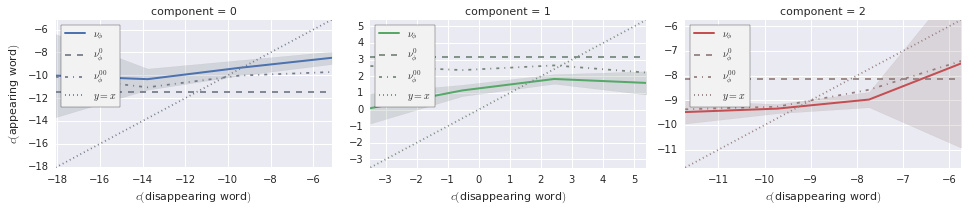

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.55336378  0.17121334  0.16053623]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.662108,-0.104694,0.348023,-0.574714,0.314974,0.005323
Component-1,0.328809,0.097435,-0.636275,-0.641539,0.256318,-0.016576
Component-2,-0.666561,0.106839,-0.665748,0.298876,-0.085841,0.066073


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 8866) |               | Elapsed Time: 0:00:13 ETA:  1 day, 9:23:24

  1% ( 111 of 8866) |                      | Elapsed Time: 0:00:14 ETA:  0:01:07

  2% ( 222 of 8866) |                      | Elapsed Time: 0:00:15 ETA:  0:00:59

  3% ( 333 of 8866) |                      | Elapsed Time: 0:00:16 ETA:  0:00:59

  4% ( 422 of 8866) |#                     | Elapsed Time: 0:00:17 ETA:  0:01:03

  5% ( 444 of 8866) |#                     | Elapsed Time: 0:00:17 ETA:  0:01:04

  6% ( 534 of 8866) |#                     | Elapsed Time: 0:00:18 ETA:  0:01:06

  6% ( 555 of 8866) |#                     | Elapsed Time: 0:00:18 ETA:  0:01:06

  7% ( 665 of 8866) |#                     | Elapsed Time: 0:00:19 ETA:  0:01:06

  8% ( 776 of 8866) |#                     | Elapsed Time: 0:00:20 ETA:  0:01:02

 10% ( 887 of 8866) |##                    | Elapsed Time: 0:00:21 ETA:  0:01:06

 11% ( 998 of 8866) |##                    | Elapsed Time: 0:00:23 ETA:  0:01:02

 12% (1109 of 8866) |##                    | Elapsed Time: 0:00:24 ETA:  0:00:59

 13% (1220 of 8866) |###                   | Elapsed Time: 0:00:25 ETA:  0:00:55

 14% (1306 of 8866) |###                   | Elapsed Time: 0:00:26 ETA:  0:00:57

 15% (1330 of 8866) |###                   | Elapsed Time: 0:00:26 ETA:  0:01:01

 16% (1441 of 8866) |###                   | Elapsed Time: 0:00:27 ETA:  0:00:59

 17% (1552 of 8866) |###                   | Elapsed Time: 0:00:28 ETA:  0:00:59

 18% (1663 of 8866) |####                  | Elapsed Time: 0:00:29 ETA:  0:00:55

 20% (1774 of 8866) |####                  | Elapsed Time: 0:00:30 ETA:  0:00:52

 21% (1885 of 8866) |####                  | Elapsed Time: 0:00:31 ETA:  0:00:51

 22% (1995 of 8866) |####                  | Elapsed Time: 0:00:32 ETA:  0:00:48

 23% (2106 of 8866) |#####                 | Elapsed Time: 0:00:33 ETA:  0:00:46

 25% (2217 of 8866) |#####                 | Elapsed Time: 0:00:34 ETA:  0:00:44

 26% (2328 of 8866) |#####                 | Elapsed Time: 0:00:35 ETA:  0:00:43

 27% (2439 of 8866) |######                | Elapsed Time: 0:00:36 ETA:  0:00:42

 28% (2549 of 8866) |######                | Elapsed Time: 0:00:37 ETA:  0:00:38

 30% (2660 of 8866) |######                | Elapsed Time: 0:00:38 ETA:  0:00:37

 31% (2771 of 8866) |######                | Elapsed Time: 0:00:39 ETA:  0:00:36

 32% (2882 of 8866) |#######               | Elapsed Time: 0:00:40 ETA:  0:00:34

 33% (2993 of 8866) |#######               | Elapsed Time: 0:00:40 ETA:  0:00:33

 35% (3104 of 8866) |#######               | Elapsed Time: 0:00:41 ETA:  0:00:31

 36% (3214 of 8866) |#######               | Elapsed Time: 0:00:42 ETA:  0:00:31

 37% (3298 of 8866) |########              | Elapsed Time: 0:00:46 ETA:  0:00:55

 37% (3325 of 8866) |########              | Elapsed Time: 0:00:46 ETA:  0:00:58

 38% (3436 of 8866) |########              | Elapsed Time: 0:00:47 ETA:  0:00:58

 40% (3547 of 8866) |########              | Elapsed Time: 0:00:48 ETA:  0:00:57

 41% (3658 of 8866) |#########             | Elapsed Time: 0:00:49 ETA:  0:00:55

 42% (3769 of 8866) |#########             | Elapsed Time: 0:00:50 ETA:  0:00:55

 43% (3879 of 8866) |#########             | Elapsed Time: 0:00:51 ETA:  0:01:02

 45% (3990 of 8866) |#########             | Elapsed Time: 0:00:52 ETA:  0:00:28

 46% (4101 of 8866) |##########            | Elapsed Time: 0:00:53 ETA:  0:00:27

 47% (4212 of 8866) |##########            | Elapsed Time: 0:00:54 ETA:  0:00:25

 48% (4323 of 8866) |##########            | Elapsed Time: 0:00:55 ETA:  0:00:25

 50% (4434 of 8866) |###########           | Elapsed Time: 0:00:56 ETA:  0:00:25

 51% (4544 of 8866) |###########           | Elapsed Time: 0:00:57 ETA:  0:00:22

 52% (4655 of 8866) |###########           | Elapsed Time: 0:00:58 ETA:  0:00:20

 53% (4723 of 8866) |###########           | Elapsed Time: 0:00:59 ETA:  0:00:22

 53% (4766 of 8866) |###########           | Elapsed Time: 0:00:59 ETA:  0:00:22

 55% (4877 of 8866) |############          | Elapsed Time: 0:01:00 ETA:  0:00:21

 56% (4988 of 8866) |############          | Elapsed Time: 0:01:01 ETA:  0:00:19

 57% (5098 of 8866) |############          | Elapsed Time: 0:01:02 ETA:  0:00:17

 58% (5209 of 8866) |############          | Elapsed Time: 0:01:03 ETA:  0:00:15

 60% (5320 of 8866) |#############         | Elapsed Time: 0:01:04 ETA:  0:00:13

 61% (5431 of 8866) |#############         | Elapsed Time: 0:01:04 ETA:  0:00:12

 62% (5542 of 8866) |#############         | Elapsed Time: 0:01:05 ETA:  0:00:11

 63% (5653 of 8866) |##############        | Elapsed Time: 0:01:06 ETA:  0:00:05

 65% (5763 of 8866) |##############        | Elapsed Time: 0:01:07 ETA:  0:00:04

 66% (5874 of 8866) |##############        | Elapsed Time: 0:01:08 ETA:  0:00:02

 67% (5985 of 8866) |##############        | Elapsed Time: 0:01:09 ETA:  0:00:02

 68% (6096 of 8866) |###############       | Elapsed Time: 0:01:10 ETA:  0:00:02

 70% (6207 of 8866) |###############       | Elapsed Time: 0:01:11 ETA:  0:00:01

 71% (6318 of 8866) |###############       | Elapsed Time: 0:01:12 ETA:  0:00:00

 72% (6428 of 8866) |###############       | Elapsed Time: 0:01:13 ETA:  0:00:00

 73% (6539 of 8866) |################      | Elapsed Time: 0:01:14 ETA:  0:00:00

 75% (6650 of 8866) |################      | Elapsed Time: 0:01:14 ETA:  0:00:00

 76% (6761 of 8866) |################      | Elapsed Time: 0:01:15 ETA:  0:00:00

 77% (6872 of 8866) |#################     | Elapsed Time: 0:01:16 ETA:  0:00:00

 78% (6982 of 8866) |#################     | Elapsed Time: 0:01:17 ETA:  0:00:00

 80% (7093 of 8866) |#################     | Elapsed Time: 0:01:18 ETA:  0:00:00

 81% (7204 of 8866) |#################     | Elapsed Time: 0:01:19 ETA:  0:00:00

 82% (7315 of 8866) |##################    | Elapsed Time: 0:01:20 ETA:  0:00:00

 83% (7426 of 8866) |##################    | Elapsed Time: 0:01:21 ETA:  0:00:00

 85% (7537 of 8866) |##################    | Elapsed Time: 0:01:21 ETA:  0:00:00

 86% (7647 of 8866) |##################    | Elapsed Time: 0:01:22 ETA:  0:00:00

 87% (7758 of 8866) |###################   | Elapsed Time: 0:01:23 ETA:  0:00:00

 88% (7869 of 8866) |###################   | Elapsed Time: 0:01:24 ETA:  0:00:00

 90% (7980 of 8866) |###################   | Elapsed Time: 0:01:25 ETA:  0:00:00

 91% (8091 of 8866) |####################  | Elapsed Time: 0:01:26 ETA:  0:00:00

 92% (8202 of 8866) |####################  | Elapsed Time: 0:01:26 ETA:  0:00:00

 93% (8312 of 8866) |####################  | Elapsed Time: 0:01:27 ETA:  0:00:00

 95% (8423 of 8866) |####################  | Elapsed Time: 0:01:28 ETA:  0:00:00

 96% (8534 of 8866) |##################### | Elapsed Time: 0:01:29 ETA:  0:00:00

 97% (8645 of 8866) |##################### | Elapsed Time: 0:01:30 ETA:  0:00:00

 98% (8756 of 8866) |##################### | Elapsed Time: 0:01:31 ETA:  0:00:00

100% (8866 of 8866) |######################| Elapsed Time: 0:01:32 Time: 0:01:32


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

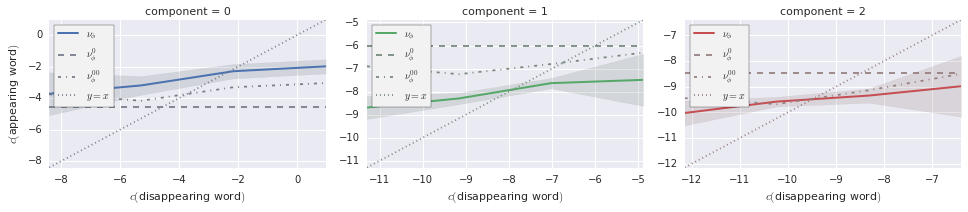

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1120 (cluster-unique) substitutions, but the PCA is in fact computed on 357 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.